### Multiclass Classification


In [11]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
import random

In [4]:
(train_data, train_labels),(test_data, test_labels) = fashion_mnist.load_data()

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
labels_name = ["Tshirts/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

## Random Data Visualization

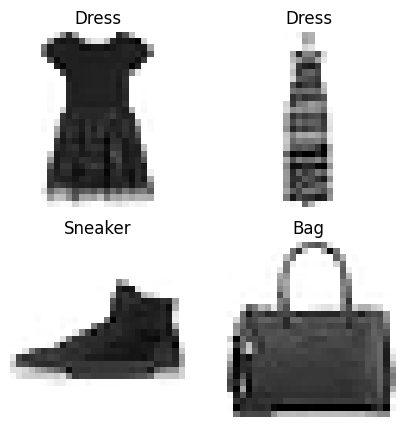

In [63]:
choice = []
for i in range(4):
    choice.append(random.randint(0,len(train_data)))
plt.figure(figsize=(5,5))

for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(train_data[choice[i]], cmap=plt.cm.binary)
    plt.title(labels_name[train_labels[choice[i]]])
    plt.axis(False)


(60000, 28, 28)